In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io 
from random import sample 
import scipy.misc 
import matplotlib.cm as cm 
from scipy import linalg 
import warnings
warnings.filterwarnings('ignore')

## K-means Clustering

In [2]:
datafile = 'data/ex7data2.mat'
mat = scipy.io.loadmat( datafile )
X = mat['X']

In [3]:
K = 3 # number of centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [21]:
def plot_data(myX,mycentroids,myidxs = None):
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    assert myX[0].shape == mycentroids[0][0].shape
    assert mycentroids[-1].shape[0] <= len(colors)

    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(mycentroids[0].shape[0]):
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    else:
        subX = [myX]
        
    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)
    
    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])
    
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

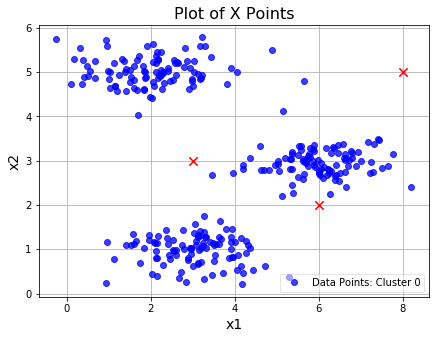

In [22]:
plot_data(X,[initial_centroids])

In [23]:
def distance_squared(point1, point2):
    assert point1.shape == point2.shape
    return np.sum(np.square(point2-point1))

In [24]:
def closest_centroid(myX, mycentroids):
    idxs = np.zeros((myX.shape[0],1))
    for x in range(idxs.shape[0]):
        mypoint = myX[x]
        mindist, idx = 9999999, 0
        for i in range(mycentroids.shape[0]):
            mycentroid = mycentroids[i]
            distance_squared = distance_squared(mycentroid,mypoint)
            if distance_squared < mindist:
                mindist = distance_squared
                idx = i
                idxs[x] = idx       
    return idxs

In [25]:
idxs = closest_centroid(X,initial_centroids)
print(idxs[:3].flatten())

[0. 2. 1.]


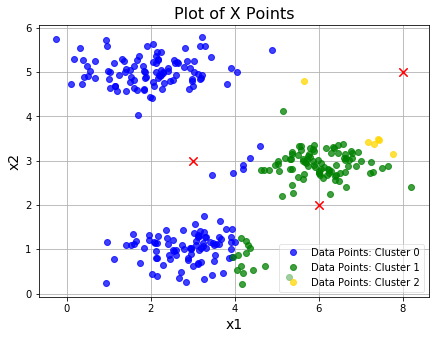

In [26]:
plot_data(X,[initial_centroids],idxs)

In [28]:
def compute_centroids(myX, myidxs):
    subX = []
    for x in range(len(np.unique(myidxs))):
        subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    return np.array([np.mean(thisX,axis=0) for thisX in subX])

In [29]:
def k_means(myX, initial_centroids, K, n_iter):
    centroid_history = []
    current_centroids = initial_centroids
    for myiter in range(n_iter):
        centroid_history.append(current_centroids)
        idxs = closest_centroid(myX,current_centroids)
        current_centroids = compute_centroids(myX,idxs)
        
    return idxs, centroid_history

In [30]:
idxs, centroid_history = k_means(X,initial_centroids,K=3,n_iter=10)

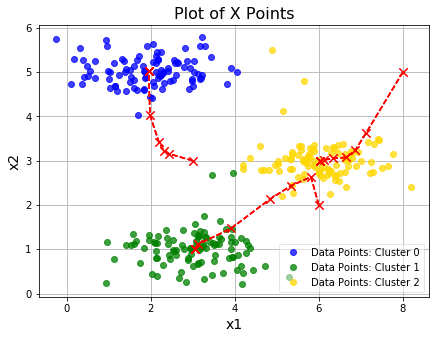

In [31]:
plot_data(X,centroid_history,idxs)

### Random initialization

In [32]:
def rand_centroids(myX, K):
    rand_indices = sample(range(0,myX.shape[0]),K)
    return np.array([myX[i] for i in rand_indices])    

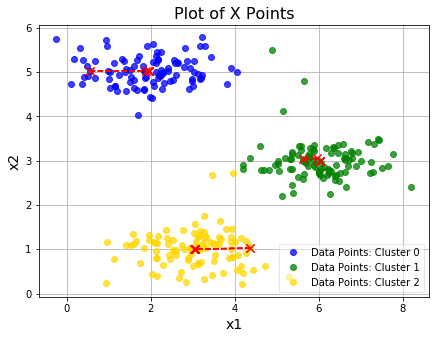

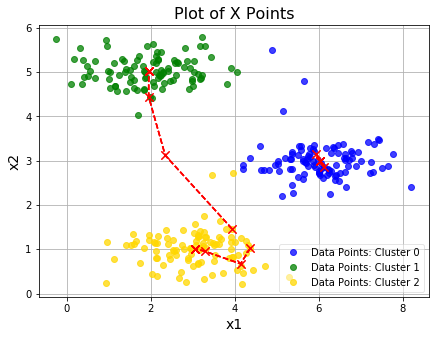

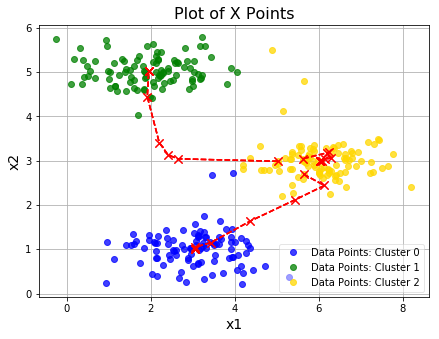

In [35]:
for x in range(3):
    idxs, centroid_history = k_means(X,rand_centroids(X,K=3),K=3,n_iter=10)
    plot_data(X,centroid_history,idxs)

## Image compression 

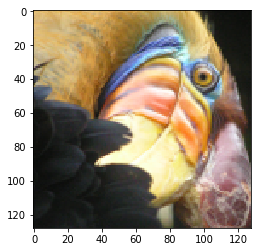

In [38]:
datafile = 'data/bird_small.png'
A = scipy.misc.imread(datafile)
dummy = plt.imshow(A)

In [39]:
A = A / 255.
A = A.reshape(-1, 3)
myK = 16
idxs, centroid_history = k_means(A,rand_centroids(A,myK), myK,n_iter=10)

In [40]:
idxs = closest_centroid(A, centroid_history[-1])

In [42]:
final_centroids = centroid_history[-1]
final_image = np.zeros((idxs.shape[0],3))
for x in range(final_image.shape[0]):
    final_image[x] = final_centroids[int(idxs[x])]

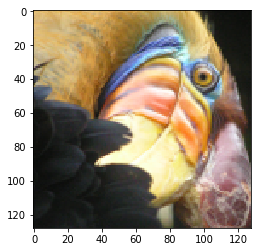

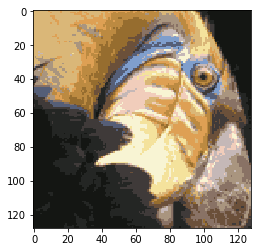

In [43]:
plt.figure()
dummy = plt.imshow(A.reshape(128,128,3))
plt.figure()
dummy = plt.imshow(final_image.reshape(128,128,3))

### Principal Component Analysis

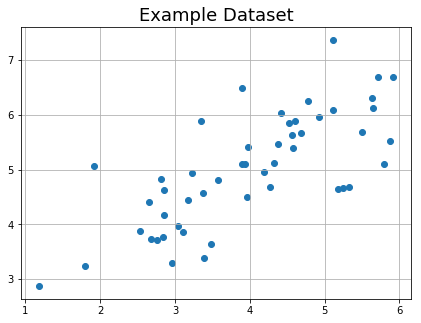

In [50]:
datafile = 'data/ex7data1.mat'
mat = scipy.io.loadmat( datafile )
X = mat['X']
plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1])
plt.title("Example Dataset",fontsize=18)
plt.grid(True)

In [51]:
def normalize(myX):
    means = np.mean(myX,axis=0)
    myX_norm = myX - means
    stds  = np.std(myX_norm,axis=0)
    myX_norm = myX_norm / stds
    return means, stds, myX_norm

In [52]:
def covariance(myX_norm):
    cov_matrix = myX_norm.T.dot(myX_norm)/myX_norm.shape[0]
    U, S, V = scipy.linalg.svd(cov_matrix, full_matrices = True, compute_uv = True)
    return U, S, V

In [53]:
means, stds, X_norm = normalize(X)
U, S, V = covariance(X_norm)

Top principal component is  [-0.70710678 -0.70710678]


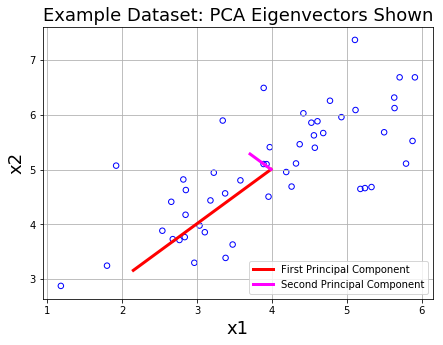

In [55]:
print('Top principal component is ',U[:,0])

plt.figure(figsize=(7,5))
plot = plt.scatter(X[:,0], X[:,1], s=30, facecolors='none', edgecolors='b')
plt.title("Example Dataset: PCA Eigenvectors Shown",fontsize=18)
plt.xlabel('x1',fontsize=18)
plt.ylabel('x2',fontsize=18)
plt.grid(True)
plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        color='red',linewidth=3,
        label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        color='fuchsia',linewidth=3,
        label='Second Principal Component')
leg = plt.legend(loc=4)

### Dimensionality Reduction with PCA

In [56]:
def project(myX, myU, K):
    Ureduced = myU[:,:K]
    z = myX.dot(Ureduced)
    return z

In [57]:
z = project(X_norm,U,1)
print('Projection of the first example is %0.3f.'%float(z[0]))

Projection of the first example is 1.496.


In [58]:
def recover(myZ, myU, K):
    Ureduced = myU[:,:K]
    Xapprox = myZ.dot(Ureduced.T)  
    return Xapprox

In [61]:
X_rec = recover(z,U,1)
print('Recovered approximation of the first example is ',X_rec[0])

Recovered approximation of the first example is  [-1.05805279 -1.05805279]


### Visualizing

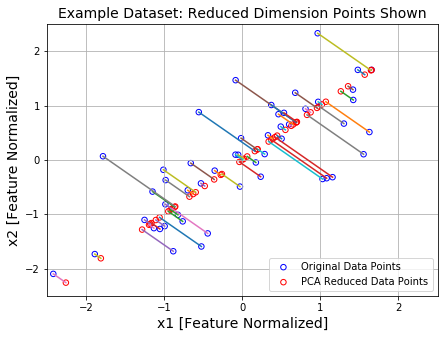

In [64]:
plt.figure(figsize=(7,5))
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]])
    
leg = plt.legend(loc=4)

dummy = plt.xlim((-2.5,2.5))
dummy = plt.ylim((-2.5,2.5))